<a href="https://colab.research.google.com/github/jwilson137/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

# Chapter 1: NLP Basics

## NLTK Basics

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords.words('english')[0:500:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

## Reading in Semi-Structured Data

In [ ]:
# Import Data Chapter 1, Section 3
rawData = open('SMSSpamCollection.tsv').read()

# Print the raw data
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [ ]:
parsedData = rawData.replace('\t','\n').split('\n')
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [ ]:
labelList = parsedData[0::2]
textList = parsedData[1::2]

In [ ]:
print(labelList[0:5])
print(textList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [ ]:
import pandas as pd

fullCorpus = pd.DataFrame({
    'label': labelList,
    'body_list': textList
})

ValueError: ignored

In [ ]:
print(len(labelList))
print(len(textList))
print(labelList[-5:])

5571
5570
['ham', 'ham', 'ham', 'ham', '']


In [ ]:
fullCorpus = pd.DataFrame({
    'label': labelList[:-1],
    'body_list': textList
})

fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
dataset = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
dataset.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


## Exploring the DataSet

In [ ]:
import pandas as pd

fullCorpus = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
fullCorpus.columns = ['label','body_text']

fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


Explore the dataset

In [ ]:
# What is the shape of the dataset? 

print("Input data has {} rows and {} columns.".format(len(fullCorpus), 
                                                      len(fullCorpus.columns)))

Input data has 5568 rows and 746 columns.


In [ ]:
#How many spam/ham are there?

print("Out of {} rows, {} are spam, and {} are ham.".format(len(fullCorpus),
                                                            len(fullCorpus[fullCorpus['label']=="spam"]),
                                                            len(fullCorpus[fullCorpus['label']=="ham"])
                                                      ))

Out of 5568 rows, 746 are spam, and 4822 are ham.


In [ ]:
#How much missing data is there? 
print("Number of null in label: {}".format(fullCorpus['label'].isnull().sum()))
print("Number of null in text: {}".format(fullCorpus['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


## Regular Expressions

In [ ]:
import re

re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This           is a made up      string to test 2     different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""different-regex-methods'

Splitting a sentence into a list of words

In [ ]:
re.split('\s', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re.split('\s', re_test_messy)

['This',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 '',
 'different',
 'regex',
 'methods']

In [ ]:
re.split('\s+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re.split('\s+', re_test_messy1)

['This-is-a-made/up.string*to>>>>test----2""""""different-regex-methods']

In [ ]:
re.split('\W+', re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re.findall('\S+', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re.findall('\S+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re.findall('\S+', re_test_messy1)

['This-is-a-made/up.string*to>>>>test----2""""""different-regex-methods']

In [ ]:
re.findall('\w+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

Replacing a specific string

In [ ]:
pep8_test = "I try to follow PEP8 guidelines"
pep7_test = "I try to follow PEP7 guidelines"
peep8_test = "I try to follow PEEP8 guidelines"

In [ ]:
import re

re.findall('[a-z]+', pep8_test)

['try', 'to', 'follow', 'guidelines']

In [ ]:
re.findall('[A-Z]+', pep8_test)

['I', 'PEP']

In [ ]:
re.findall('[A-Z]+[0-9]+', peep8_test)

['PEEP8']

In [ ]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', pep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

Other examples 


*   re.search()
*   re.match()
* re.



## Machine Learning Pipeline
1. Raw Text - model cant distinguish
2. Tokenize - tell the model what to look at
3. Clean text - remove stopwords/punctuation, stemming, etc. 
4. Vectorize - convert to numeric form
5. Machine learning algorithm - fit/train model
6. Spam filter - system to filter **emails**

### Pre-processing text data.
We clean the data to highlight attributes that the ML system can work with more easily.  
1. **Remove punctuation**
2. **Tokenization**
3. **Remove Stopwords**
4. Lemmatize/Stem

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth',100)

data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


Remove punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
"I like NLP." == "I like NLP"

False

In [ ]:
def remove_punct(text):
  text_nopunct = "".join([char for char in text if char not in string.punctuation])
  return text_nopunct

data['body_text_clean'] = data['body_text'].apply(remove_punct)

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


Tokenization

In [ ]:
import re

def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [ ]:
'NLP' == 'nlp'

False

Remove Stopwords

In [ ]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
def remove_stopwords(tokenized_list):
  text = [word for word in tokenized_list if word not in stopwords]
  return text

data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


# Chapter 2: Supplemental Data Cleaning

STEMMING 
* reduce inflected words to their word stem or root 
* reduces variations of the same root word
* Porter stemmer is the most popular




In [ ]:
import nltk
ps = nltk.PorterStemmer()

In [ ]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [ ]:
print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

grow
grow
grow


In [ ]:
print(ps.stem('meaning'))
print(ps.stem('mean'))

mean
mean


In [ ]:
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


Read in raw text

In [ ]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words('english')
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

data.head()

def clean_text(text):
  text = "".join(char for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text)
  text = [word for word in tokens if word not in stopwords]
  return text

data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x.lower()))

data.head()

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


Stem Text

In [ ]:
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))

data.head()

,label,body_text,body_text_nostop,body_text_stemmed
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."


LEMMATIZING
* group together inflected forms of a word and analyize them as a single term (the words lemma)
* vocab analysis of words aiming to remove inflectional endings and return the dictionary form
* stemming takes a crude approach and does not return a dictionary word
*lemmatizers will always return a dictionary word, is more accurate, but is more computationally intensive

Test out WordNet lemmatizer

In [ ]:
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [ ]:
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [ ]:
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


In [ ]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [ ]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


Read in Raw Text

In [ ]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words('english')
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


Clean up text

In [ ]:
def clean_text(text):
  text = "".join(char for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text)
  text = [word for word in tokens if word not in stopwords]
  return text

data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x.lower()))

data.head()

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


In [ ]:
def lemmatizing(tokenized_text):
  text = [wn.lemmatize(word) for word in tokenized_text]
  return text

data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: lemmatizing(x))

data.head()

,label,body_text,body_text_nostop,body_text_stemmed
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."


# Chapter 3: Vectorizing Raw Data

**VECTORIZING**: encoding text as integers to create feature vector. 

**FEATURE VECTOR**: n-dimensional vector of numerical features that represent some object

Vectoriztion Types: 

1. Count vectorization - based on appearance of word 
2. N-grams
3. Term frequency -- inverse document frequency (TF-IDF)

## 3.1: Count Vectorization



COUNT VECTORIZATION creates a document-term matrix where the entry of each cell will be the count of the number of times that words occured in that document. 

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
import re
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Read in Raw Data

In [6]:
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

Create function to remove punct, tokenize, remove stopwords, and stem

In [52]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
  text = "".join(char for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

Apply CountVectorizer

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
# No need to use lambda function as before to use clean_text  
# because CountVectorizer will handle this for us

count_vect = CountVectorizer(analyzer=clean_text)
#X_counts = count_vect.fit(data['body_text']) #not vectorized?
X_counts = count_vect.fit_transform(data['body_text']) #vectorized?

print(X_counts.shape)
print(count_vect.get_feature_names_out())

(5567, 8334)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


Apply CountVectorizer to smaller example

In [54]:
data_sample = data[0:20]
count_vect_sample = CountVectorizer(analyzer=clean_text)
X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])

print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names_out())



(20, 212)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'A' 'As' 'Co'
 'Eh' 'FA' 'HL' 'He' 'I' 'Im' 'Is' 'No' 'ON' 'Oh' 'R' 'So' 'TC' 'To' 'U'
 'aft' 'aid' 'alreadi' 'alright' 'anymor' 'appli' 'ard' 'around' 'b'
 'brother' 'call' 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim'
 'click' 'code' 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri'
 'csh11' 'cup' 'custom' 'da' 'date' 'dont' 'eg' 'england' 'enough'
 'entitl' 'entri' 'even' 'feel' 'ffffffffff' 'final' 'fine' 'finish'
 'first' 'free' 'friend' 'from' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'ha'
 'had' 'have' 'home' 'hour' 'httpwap' 'info' 'ive' 'jackpot' 'joke' 'k'
 'kim' 'kl341' 'lar' 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch'
 'macedonia' 'make' 'may' 'meet' 'mell' 'membership' 'messag'
 'minnaminungint' 'miss' 'mobil' 'month' 'nah' 'name' 'nation' 'naug

Vectorizers output sparse matrices

**SPARSE MATRIX**: a matrix in which most entries are 0. For efficient storage, a sparse matrix will be stored by only storing the location of the nonzero elements. 

In [55]:
X_counts_sample

<20x212 sparse matrix of type '<class 'numpy.int64'>'
	with 242 stored elements in Compressed Sparse Row format>

In [56]:
# must expand sparse matrix into a collection of arrays, 
# and THEN create a dataframe
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211
0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
# sometimes we want to have the corresponding words for column names
X_counts_df.columns = count_vect_sample.get_feature_names_out()
X_counts_df.head()

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,2,20000,2005,21st,3,4,4403ldnw1a7rw18,4txtú120,6day,81010,87077,87121,87575,9,900,A,As,Co,Eh,FA,HL,He,I,Im,Is,No,ON,Oh,R,So,...,then,they,think,though,tkt,today,tonight,treat,tri,trywal,tsandc,txt,u,updat,ur,urgent,use,usf,v,valid,valu,vettam,want,wap,watch,way,week,wet,will,win,winner,with,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3.2: N-Gram Vectorization

N-GRAMS crates a document-term matrix where couns still occupy the cell, but, intstead of columns representing single terms, they represent all combindations of adjacent words of length $N$ in your text. 

"NLP is an interesting topic."

| n           | Name        | Tokens      |
| ----------- | ----------- | ----------- |
| 2           | bigram      | ['nlp is', 'is an', 'an interesting', 'interesting topic']
| 3           | trigram     | ['nlp is an', 'is an interesting', 'an interesting topic']
| 4           | four-gram   | ['nlp is an interesting', 'is an interesting topic']


Usually there is an optimal value for $N$.



Read in Raw Data

In [58]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
import re
import string
import nltk
nltk.download('stopwords')

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Create function to remove punct, tokenize, remove stopwords, and stem

In [61]:
def clean_text(text):
  text = "".join(char.lower() for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text)
  # alteration to previous cleaner
  # returns a string containing the sentence(s) 
  text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
  return text

data['cleaned_text'] = data['body_text'].apply(clean_text)
data.head()

,label,body_text,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...


Apply CountVectorizer (with N-Grams)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2)) 
# not passing in cleaning function so no analyzer
X_counts = ngram_vect.fit_transform(data['cleaned_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names_out())

(5567, 31942)
['008704050406 sp' '0089my last' '0121 2025050' ... 'üll submitting'
 'üll take' '〨ud evening']


In [42]:
data_sample = data[0:20]

ngram_vect_sample = CountVectorizer(ngram_range=(2,2)) 
# not passing in cleaning function so no analyzer
X_counts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text'])
print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names_out())

# N-gram range can make the matrix very large

(20, 198)
['09061701461 claim' '100 20000' '100000 prize' '11 months' '12 hours'
 '150pday 6days' '16 tsandcs' '20000 pounds' '2005 text' '21st may'
 '4txtú120 poboxox36504w45wq' '6days 16' '81010 tc' '87077 eg'
 '87077 trywales' '87121 receive' '87575 cost' '900 prize' 'aft finish'
 'aids patent' 'alright way' 'anymore tonight' 'apply 08452810075over18s'
 'apply reply' 'ard smth' 'around though' 'brother like'
 'call 09061701461' 'call mobile' 'callers press' 'callertune callers'
 'camera free' 'cash 100' 'chances win' 'claim 81010' 'claim call'
 'claim code' 'click httpwap' 'click wap' 'co free' 'code kl341'
 'colour mobiles' 'comp win' 'copy friends' 'cost 150pday' 'credit click'
 'cried enough' 'csh11 send' 'cup final' 'customer selected' 'da stock'
 'date sunday' 'dont miss' 'dont think' 'dont want' 'eg england'
 'eh remember' 'england 87077' 'england macedonia' 'enough today'
 'entitled update' 'entry questionstd' 'entry wkly' 'even brother'
 'fa 87121' 'fa cup' 'feel way' 'fffff

In [49]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns = ngram_vect_sample.get_feature_names_out()

X_counts_df

,09061701461 claim,100 20000,100000 prize,11 months,12 hours,150pday 6days,16 tsandcs,20000 pounds,2005 text,21st may,4txtú120 poboxox36504w45wq,6days 16,81010 tc,87077 eg,87077 trywales,87121 receive,87575 cost,900 prize,aft finish,aids patent,alright way,anymore tonight,apply 08452810075over18s,apply reply,ard smth,around though,brother like,call 09061701461,call mobile,callers press,callertune callers,camera free,cash 100,chances win,claim 81010,claim call,claim code,click httpwap,click wap,co free,...,talk stuff,tc wwwdbuknet,team 87077,text fa,think goes,tkts 21st,tonight ive,treat like,try months,trywales scotland,tsandcs apply,txt csh11,txt message,txt ratetcs,txt ur,txt word,update co,update latest,ur lunch,ur national,urgent week,use credit,usf lives,valid 12,valued network,vettam set,want talk,wap link,way feel,way gota,way meet,week free,win cash,win fa,winner valued,wkly comp,word claim,wwwdbuknet lccltd,xxxmobilemovieclub use,yes naughty
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


## 3.3: TF-IDF

Term Frequency–Inverse Document Frequency

$$w_{i,j}=\text{tf}_{i,j}\times\log\left(\frac{N}{\text{df}_i}\right)$$

$\text{tf}_{ij}$ is the number of times $i$ occurs in $j$ divided by the total number of terms in $j$

$\text{df}_{i}$ is the number of documents containing $i$

$N$ is the total number of documents


Example: Consider the SMS "I like NLP" in a corpus of 20 total text messages, and the considered text message is the only one that contains the string "NLP". Then,  


$\text{tf}_{\text{NLP},j}=\frac{\text{# of occurences of NLP}}{\text{number of words in the text message}}=\frac{1}{3}$, 

$N=20$, and

$\text{df}_{\text{NLP}}=1$. 

Therefore, 

$w_{i,j}=\text{tf}_{i,j}\times\log\left(\frac{N}{\text{df}_i}\right)$

$\phantom{w_{i,j}}=\frac{1}{3}\times\log\left(\frac{20}{1}\right)$

$\phantom{w_{i,j}}=\frac{1}{3}\times\log(20)$

$\phantom{w_{i,j}}\approx 0.4337$

The rarer the word, the higher the value. Pulls out important (but rare) words. 





Read in Text

In [51]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
import re
import string
import nltk
nltk.download('stopwords')

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Create function to remove punct, tokenize, remove stopwords, and stem

In [62]:
def clean_text(text):
  text = "".join(char.lower() for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text) 
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

,label,body_text,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."


Apply TfidfVectorizer

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(5567, 8104)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


Apply TfidfVectorizer to Smaller Sample

In [67]:
data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer = clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])

print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names_out())

(20, 192)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'alreadi' 'alright' 'anymor' 'appli' 'ard' 'around' 'b' 'brother' 'call'
 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim' 'click' 'co' 'code'
 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri' 'csh11' 'cup'
 'custom' 'da' 'date' 'dont' 'eg' 'eh' 'england' 'enough' 'entitl' 'entri'
 'even' 'fa' 'feel' 'ffffffffff' 'final' 'fine' 'finish' 'first' 'free'
 'friend' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'ha' 'hl' 'home' 'hour'
 'httpwap' 'im' 'info' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341' 'lar'
 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'macedonia' 'make'
 'may' 'meet' 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil'
 'month' 'nah' 'name' 'nation' 'naughti' 'network' 'news' 'next' 'nurungu'
 'oh' 'oru' 'patent' 'pay' 'per' 'pobox' 'p

In [69]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names_out()

X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,2,20000,2005,21st,3,4,4403ldnw1a7rw18,4txtú120,6day,81010,87077,87121,87575,9,900,aft,aid,alreadi,alright,anymor,appli,ard,around,b,brother,call,caller,callertun,camera,cash,...,sunday,talk,tc,team,text,think,though,tkt,today,tonight,treat,tri,trywal,tsandc,txt,u,updat,ur,urgent,use,usf,v,valid,valu,vettam,want,wap,watch,way,week,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157831,0.000000,0.198986,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.198986,0.000000,0.000000,0.198986,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.133757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.174912,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.362045,0.362045,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223607,0.447214,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223607,0.000000,0.00

# Chapter 4: Feature Engineering

We have clean data with labels that are prepared to be used for some model. 

FEATURE ENGINEERING is the process of creating new features or transforming features to get the most out of your data. 

Examples of New Features
* length of text field
* percent of characters that are punctuation
* percent of characters that are capitalized

Transformation
* power transformations (square, square root, etc.)
* standardizing data when there are lots of outliers (log transform)
* want to make sure all features on the same scale


Always keep the problem you are trying to solve in mind. 



## 4.1: Feature Creation

Read in text

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

Create feature for text message length

In [71]:
data['body_len'] = data['body_text'].apply(lambda x: len(x)-x.count(" "))

data.head()

,label,body_text,cleaned_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...",128
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]",62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ...",135


Create feature for % of text that is punctuation. 

In [78]:
import string

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,cleaned_text,body_len,punct_percent,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...",128,4.7,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]",49,4.1,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]",62,3.2,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",28,7.1,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ...",135,4.4,4.4


## 4.2 Feature Evaluation

Evaluating Created Features

Are these created features helpful? 

In [81]:
import pandas as pd
import string

# Read in text
pd.set_option('display.max_colwidth', 100)
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

# length of SMS
data['body_len'] = data['body_text'].apply(lambda x: len(x)-x.count(" "))


# % punct of SMS

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

In [82]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

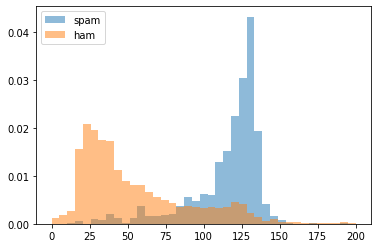

In [89]:
bins = np.linspace(0, 200, 40)

data_hist_spam = data[data['label']=='spam']['body_len']
plt.hist(data_hist_spam, bins, 
         alpha=0.5, 
         density=True, 
         stacked=True,
         label = 'spam')

data_hist_ham = data[data['label']=='ham']['body_len']
plt.hist(data_hist_ham, bins, 
         alpha=0.5, 
         density=True, 
         stacked=True,
         label = 'ham')

plt.legend(loc='upper left')
plt.show()

There is a clear difference between ham and spam considering length.

Spam messages tend to be longer. 

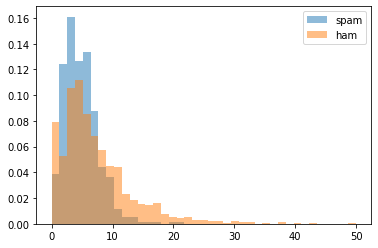

In [90]:
bins = np.linspace(0, 50, 40)

data_hist_spam = data[data['label']=='spam']['punct%']
plt.hist(data_hist_spam, bins, 
         alpha=0.5, 
         density=True, 
         stacked=True,
         label = 'spam')

data_hist_ham = data[data['label']=='ham']['punct%']
plt.hist(data_hist_ham, bins, 
         alpha=0.5, 
         density=True, 
         stacked=True,
         label = 'ham')

plt.legend(loc='upper right')
plt.show()

There is **NOT** a clear difference between ham and spam considering punct%

Spam messages do not have considerabliy more punctuation than ham. 

We will ere on the side of caution and leave this feature in just in case. 

## 4.3 Transformations

Read text and create new features. 

In [91]:
import pandas as pd
import string

# Read in text
pd.set_option('display.max_colwidth', 100)
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

# length of SMS
data['body_len'] = data['body_text'].apply(lambda x: len(x)-x.count(" "))


# % punct of SMS

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

Plot New Features

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

*Length of Text*

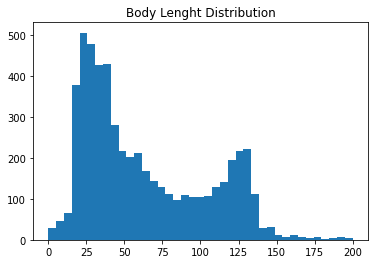

In [92]:
bins = np.linspace(0, 200, 40)

plt.hist(data['body_len'], bins)
plt.title('Body Length Distribution')
plt.show()

Not a good candidate for transformation. 

*Punctuation Percentage*

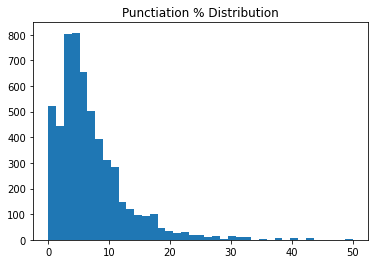

In [94]:
bins = np.linspace(0, 50, 40)

plt.hist(data['punct%'], bins)
plt.title('Punctiation % Distribution')
plt.show()

Because of the long tail, we will focus on Punctuation percentage features for transformation. 

## 4.4: Box-Cox Power Transformation

Base Form: $y^x$

| X           | Base Form        | Transformation      |
| ----------- | ----------- | ----------- |
| $-2$           | $y^{-2}$   | $1/y^2$|
| $-1$           | $y^{-1}$   | $1/y$|
| $-0.5$           | $y^{-1/2}$   | $1/\sqrt{y}$|
| $0$           | $y^0$   | $\log(y)$|
| $0.5$           | $y^{1/2}$   | $\sqrt{y}$|
| $1$           | $y^1$   | $y$|
| $2$           | $y^{2}$   | $y^2$|


Transformation Process:

1. Determine what range of exponents to test. 
2. Apply each transformation to each value of your chosen feature. 
3. Use some criteria to determine which of the transformations yield the best distribution. 

In [95]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Read in text
pd.set_option('display.max_colwidth', 100)
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']


# % punct of SMS
def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

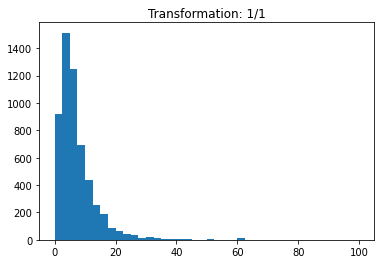

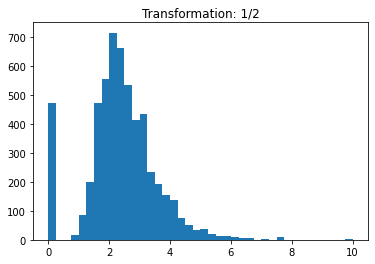

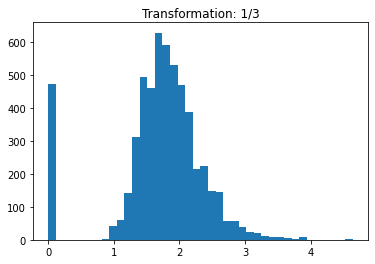

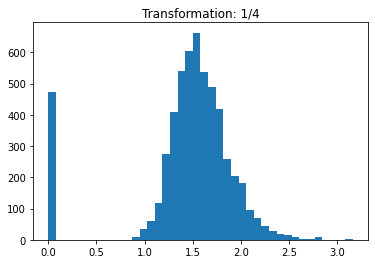

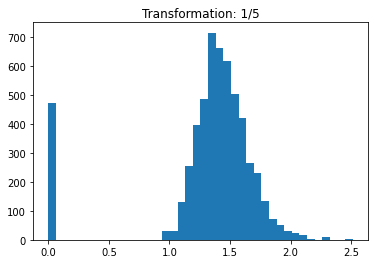

In [98]:
# negative exponets will no work on our data

for i in range(1,6):
  plt.hist(data['punct%']**(1/i), bins=40)
  plt.title("Transformation: 1/{}".format(str(i)))
  plt.show()

# Chapter 5: Building Machine Learning Classifiers

## 5.1: What is Machine Learning? 

MACHINE LEARNING 

> "The field of study that gives computers the ability to learn without being explicity programmed" - Arthur Samuel, 1959 
 

> "A computer program is said to learn from experience $E$ with respect to some task $T$ and some performance measure $P$, if its performance on $T$, as measured by $P$, improves with experience $E$. - Tom Michell, 1998

> "Algorithms that can 'figure out how to perform important tasks from examples.'" - Unattributed, Universtiy of Washington, 2012

> "Practice of using altorithms to parse data, learn from it, and then make a determineation or prediction about something in the world." - NVIDIA, 2016

Two Broad Types of Machine Learning


1.   Supervised Learning 
  * Inferring a function from labeled training data to make predictions on unseen data. 
  * Ex. Spam filter
2.   Unsupervised Learning
  * No explicit lables, but you still want to derive structure from the data that is given. 
  * Ex. Group together emails into distinct folders based on content. 




## 5.2: Cross-Validation and Evaluation

HOLDOUT TEST SET - a sample of data that is not used during fitting. 

$K$-FOLD CROSS-VALIDATION - full dataset is divided into $k$ subsets and the holdout method is repeated $k$ times. Each time, one of the $k$ subsets is used as the test set and the other $k-1$ subsets are put together to be used to train the model. More robust read, but not used for deep learning. 

Evaluation Methods

* $\text{accuracy} = \frac{\text{# of predicted correctly}}{\text{total # of observations}}$

* $\text{precision} = \frac{\text{# predicted as spam that are actually spam}}{\text{total # predicted as spam}}$

* $\text{recall} = \frac{\text{# predicted as spam that are actually spam}}{\text{total # that are actually spam}}$

 
If false positives are costly, optimize for precision.
If false negatives are costly, optimize for recall. 

## 5.3: Introducing Random Forest

ENSEMBLE METHOD  - a technique that that creates multiple models and the combines them to produce better results than any of the single models individually. 

RANDOM FOREST - ensemble learning method that constructs a collection of decision trees then aggregates the predicitons of each tree to determine the final prediciton. Simple voting method. 

Benefits of Ensemble Method:
* Can be used for classification or regularization. 
* Easily handles outliers, missing values, skewed data, 
* Accepts different types of inputs (continuous, ordinal, etc.)
* Less likely to overfit
* Outputs feature performance

## 5.4: Building A Random Forest Model

In [4]:
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def text_len(text):
  return len(text)-text.count(" ")

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/text_len(text), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: text_len(x))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
  text = "".join(char.lower() for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text) 
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,8064,8065,8066,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Explore RandomForestClassifier Attributes and Hyperparameters

In [5]:
from sklearn.ensemble import RandomForestClassifier


print(dir(RandomForestClassifier))
print(RandomForestClassifier())

# important attributes: 
# feature_importances: outputs importance of feature to model
# fit: outputs model
# predict: use on output model to predict

# important hyperparameters: 
# max_depth: max depth of estimator
# n_estimators: # of estimators (vote from these trees decide)

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_estimator_type', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score_and_attributes', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'n_features_', 'predict', 'predict_log_proba', 'predict_proba', 'score',

Explore RandomForestClassifier through Cross-Validation

In [6]:
from sklearn.model_selection import KFold, cross_val_score

In [7]:
rf = RandomForestClassifier(n_jobs=-1) # allows us to run faster for processes in parallel
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], 
                cv=k_fold, 
                scoring='accuracy', 
                n_jobs=-1)

array([0.97576302, 0.97755835, 0.97214735, 0.96585804, 0.97304582])

## 5.5: Random Forest with Holdout Test Set

Read in an clean text

In [8]:
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def text_len(text):
  return len(text)-text.count(" ")

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/text_len(text), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: text_len(x))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
  text = "".join(char.lower() for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text) 
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,8064,8065,8066,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Explore RandomForestClassifier through Holdout Test Set

In [13]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs = -1)
rf_model = rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [20]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.05554747414883647, 1803),
 (0.04477310378145211, 'body_len'),
 (0.03540266654491777, 3134),
 (0.031995782926044256, 4796),
 (0.024098517671926434, 5724),
 (0.022128662160797494, 2031),
 (0.019322691123525578, 7461),
 (0.01778404212375182, 6285),
 (0.017167848254961898, 7782),
 (0.016929378425967378, 7350)]

In [22]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label ='spam', average='binary')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [27]:
print("Precision: {} / Recall: {} / Accuracy: {}".format(round(precision,3),
                                                         round(recall,3),
                                                         round((y_pred==y_test).sum() / len(y_pred),3)
                                                         ))

Precision: 1.0 / Recall: 0.596 / Accuracy: 0.811


## 5.6: Random Forest Model with Grid Search

GRID SEARCH - Exhaustively search all parameter combinations in a given gri to determine the best model. 




Read in and clean text

In [24]:
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def text_len(text):
  return len(text)-text.count(" ")

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/text_len(text), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: text_len(x))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
  text = "".join(char.lower() for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text) 
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,8064,8065,8066,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Build our own grid search

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [28]:
def train_RF(n_est, depth):
  rf = RandomForestClassifier(n_estimators=n_est , max_depth=depth, n_jobs = -1)
  rf_model = rf.fit(X_train, y_train)
  y_pred = rf_model.predict(X_test)
  precision, recall, fscore, support = score(y_test, y_test, 
                                             pos_label='spam', 
                                             average='binary')
  metric_string = "Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}"
  print(metric_string.format(n_est, depth, 
                             round(precision,3),
                             round(recall,3),
                             round((y_pred==y_test).sum() / len(y_pred),3)
                            ))

In [29]:
for n_est in [10, 50, 100]:
  for depth in [10, 20, 30, None]:
    train_RF(n_est, depth)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 0.9


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 0.939


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 0.947


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 10 / Depth: None ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 0.965


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 0.899


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 0.948


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 0.961


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 0.976


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 0.9


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 0.943


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 0.963
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 0.973


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## 5.7: Evaluate Random Forest Model Performance

Read in and clean text

In [126]:
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def text_len(text):
  return len(text)-text.count(" ")

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/text_len(text), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: text_len(x))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
  text = "".join(char.lower() for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text) 
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Exploring parameter settings using GridSearchCV

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [128]:
rf = RandomForestClassifier()
param = {
    'n_estimators': [10, 150, 300], 
    'max_depth': [30, 60, 90, None]
    }

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,9.550984,0.083155,0.123079,0.003638,None,150,"{'max_depth': None, 'n_estimators': 150}",0.978456,0.973968,0.973944,0.965858,0.972147,0.972875,0.004080,1
7,8.252398,0.098440,0.108651,0.004987,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.978456,0.976661,0.973046,0.965858,0.964960,0.971796,0.005506,2
8,16.422125,0.050352,0.211489,0.009017,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.975763,0.974865,0.971249,0.966757,0.969452,0.971617,0.003352,3
11,17.664402,2.904319,0.222778,0.022991,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975763,0.973968,0.973944,0.965858,0.967655,0.971438,0.003920,4
6,0.563194,0.011875,0.012271,0.000345,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.977558,0.973070,0.973046,0.964960,0.966757,0.971078,0.004603,5


In [129]:
rf = RandomForestClassifier()
param = {
    'n_estimators': [10, 150, 300], 
    'max_depth': [30, 60, 90, None]
    }

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_count, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,9.575239,0.154904,0.120872,0.001875,None,150,"{'max_depth': None, 'n_estimators': 150}",0.977558,0.971275,0.973944,0.966757,0.968553,0.971617,0.003843,1
11,17.460961,2.743230,0.219844,0.024802,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975763,0.972172,0.972147,0.967655,0.964960,0.970539,0.003795,2
7,8.064525,0.028101,0.110979,0.009610,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.976661,0.972172,0.973046,0.965858,0.964960,0.970539,0.004460,3
8,16.096820,0.077564,0.216258,0.010161,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.975763,0.969479,0.971249,0.965858,0.965858,0.969641,0.003707,4
3,0.406336,0.006080,0.011301,0.001065,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.978456,0.971275,0.968553,0.964061,0.963163,0.969102,0.005535,5


## 5.8: Introducing Gradient Boosting

GRADIENT BOOSTING - ensemble learning method that takes an iterative approach to combining weak learners to create a strong learner by focusing on mistakes of prior iterations

Trade Offs

| Pros      | Cons |
| ----------- | ----------- |
| Extremely powerful      | Longer to train       |
| Accepts various types of inputs   | More likely to overfit        |
| Can be used for classification or regression    |         |
| Outputs feature performance    | More difficult to properly tune (more parameters)        |

## 5.9: Gradient-Boosting Model Performance

Read in and clean data

In [130]:
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def text_len(text):
  return len(text)-text.count(" ")

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/text_len(text), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: text_len(x))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
  text = "".join(char.lower() for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text) 
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Explore GradientBoostingClassifier Attributes and Hyperparameters

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

In [134]:
print(dir(GradientBoostingClassifier))
print(GradientBoostingClassifier())

['_SUPPORTED_LOSS', '__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_initialized', '_check_n_features', '_check_params', '_clear_state', '_compute_partial_dependence_recursion', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', '_make_estimator', '_more_tags', '_raw_predict', '_raw_predict_init', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_resize_state', '_staged_raw_predict', '_validate_data', '_validate_estimator', '_validate_y', '_warn_ma

Build our own Grid-Search

In [139]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [145]:
def trainGB(est, max_depth, lr):
  gb = GradientBoostingClassifier(n_estimators=n_est, max_depth=max_depth, learning_rate=lr)
  gb_model = gb.fit(X_train, y_train)
  y_pred = gb_model.predict(X_test)
  precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
  metric_string = "Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}"
  print(metric_string.format(n_est, max_depth, lr, 
                            round(precision,3),
                            round(recall,3),
                            round((y_pred==y_test).sum() / len(y_pred),3)
                          ))

In [146]:
for n_est in [50, 100, 150]:
  for max_depth in [3, 7, 11, 15]:
    for lr in [0.01, 0.1, 1]:
      trainGB(n_est, max_depth, lr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.

Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.855


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.973 / Recall: 0.667 / Accuracy: 0.949


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.933 / Recall: 0.772 / Accuracy: 0.959


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 1.0 / Recall: 0.019 / Accuracy: 0.857


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.948 / Recall: 0.79 / Accuracy: 0.963


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.901 / Recall: 0.784 / Accuracy: 0.956


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 1.0 / Recall: 0.019 / Accuracy: 0.857


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.934 / Recall: 0.784 / Accuracy: 0.961


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.93 / Recall: 0.821 / Accuracy: 0.965


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 1.0 / Recall: 0.012 / Accuracy: 0.856


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.922 / Recall: 0.802 / Accuracy: 0.961


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.884 / Recall: 0.802 / Accuracy: 0.956


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 3 / LR: 0.01 ---- Precision: 0.955 / Recall: 0.519 / Accuracy: 0.926


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 3 / LR: 0.1 ---- Precision: 0.975 / Recall: 0.722 / Accuracy: 0.957


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 3 / LR: 1 ---- Precision: 0.918 / Recall: 0.759 / Accuracy: 0.955


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 7 / LR: 0.01 ---- Precision: 0.94 / Recall: 0.673 / Accuracy: 0.946


KeyboardInterrupt: ignored

## 5.10: Evaluate Gradient-Boosing Model with GridSearchCV

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def text_len(text):
  return len(text)-text.count(" ")

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/text_len(text), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: text_len(x))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
  text = "".join(char.lower() for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text) 
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

Exploring parameter settings using GridSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [147]:
gb = GradientBoostingClassifier()
param={
    'n_estimators': [100, 150], 
    'max_depth': [7, 11, 15], 
    'learning_rate': [0.1], 
}

gs = GridSearchCV(gb, param, cv=5, n_jobs=-1) 
#models will be trained on different parameters in //

cv_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(cv_fit.cv_results_, ascending=False)[0:5]

KeyboardInterrupt: ignored

In [ ]:
gb = GradientBoostingClassifier()
param={
    'n_estimators': [100, 150], 
    'max_depth': [7, 11, 15], 
    'learning_rate': [0.1], 
}

gs = GridSearchCV(gb, param, cv=5, n_jobs=-1) 
#models will be trained on different parameters in //

cv_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(cv_fit.cv_results_, ascending=False)[0:5]

## 5.11: Model Selection: Data prep

Process: 
1. Split Data into training and test sets
2. Train vectorizers on training set and use that to transform the test set. 
3. Fit best random forest model and best gradient boosting model on training set and predict on test set. 
4. Thoroughly evaluate results of these two models to select the best model.  

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def text_len(text):
  return len(text)-text.count(" ")

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/text_len(text), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: text_len(x))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
  text = "".join(char.lower() for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text) 
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

Split into train/test

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2)

Vectorize Text

In [156]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len','punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())],axis=1)
X_test_vect = pd.concat([X_train[['body_len','punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())],axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,7188,7189,7190,7191,7192,7193,7194,7195,7196,7197,7198,7199,7200,7201,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211,7212,7213,7214,7215,7216,7217,7218,7219,7220,7221,7222,7223,7224,7225,7226,7227
0,127,7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,3.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5.12: Model Selection: Results

In [157]:
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def text_len(text):
  return len(text)-text.count(" ")

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/text_len(text), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: text_len(x))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
  text = "".join(char.lower() for char in text if char not in string.punctuation)
  tokens = re.split('\W+', text) 
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2)

In [168]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len','punct%']].reset_index(drop=True), 
                          pd.DataFrame(tfidf_train.toarray())],axis=1)

X_test_vect = pd.concat([X_train[['body_len','punct%']].reset_index(drop=True), 
                         pd.DataFrame(tfidf_test.toarray())],axis=1)
X_test_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,7129,7130,7131,7132,7133,7134,7135,7136,7137,7138,7139,7140,7141,7142,7143,7144,7145,7146,7147,7148,7149,7150,7151,7152,7153,7154,7155,7156,7157,7158,7159,7160,7161,7162,7163,7164,7165,7166,7167,7168
0,63,7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,11.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Final Evaluation of Models

In [165]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [174]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = start-end

start = time.time()
y_pred = rf_model.predict(X_test_vect) 
end = time.time()
pred_time = start-end
# not sure where NaN issue is coming from
# Not in video 

precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

metric_string = "Fit Time: {} / Pred Time: {} / Precision: {} / Recall: {} / Accuracy: {}"
print(metric_string.format(round(fit_time,3),
                           round(pred_time,3),
                           round(precision,3),
                           round(recall,3),
                           round((y_pred==y_test).sum() / len(y_pred),3)
                        ))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


ValueError: ignored

In [ ]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=None)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = start-end

start = time.time()
y_pred = gb_model.predict(X_test_vect) 
end = time.time()
pred_time = start-end
# not sure where NaN issue is coming from
# Not in video 

precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

metric_string = "Fit Time: {} / Pred Time: {} / Precision: {} / Recall: {} / Accuracy: {}"
print(metric_string.format(round(fit_time,3),
                           round(pred_time,3),
                           round(precision,3),
                           round(recall,3),
                           round((y_pred==y_test).sum() / len(y_pred),3)
                        ))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
